# Neural firing during baseline activity in visual cortex
<p>Figures: example raw signal, power spectra with SpecParam fit superimposed, schematic of parameters in baseline, histogram of parameters across channels in baseline
<p>
<p>created: September 18, 2024
<p>last modified: September 19, 2024


## Set-up

In [ ]:
# auto-reload
%load_ext autoreload
%autoreload 2

In [45]:
# general
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neurodsp.utils import create_times
from neurodsp.spectral import compute_spectrum
from specparam.plts.annotate import plot_annotated_model
from fooof import FOOOF

# custom
import sys
sys.path.append("../../code")
from paths import PROJECT_PATH, EXTERNAL_PATH
from info import SESSIONS, FS, TOTAL_CHANS, EPOCH_TIMES
from settings import SPECPARAM_SETTINGS, FREQS, BANDS
from plots import plot_schematic

In [3]:
# general settings
plt.style.use('../../mpl_styles/default.mplstyle')

### Functions

### Create output directory

In [4]:
# dir_out = f"{PROJECT_PATH}/figures/"
# if not os.path.exists(dir_out):
#     os.makedirs(dir_out)

#### load data

In [25]:
print(SESSIONS)

['A_SNR_140819', 'L_SNR_250717']


In [33]:
# choose a random array from session of interest
lfp = np.load(fr"{EXTERNAL_PATH}\data\lfp\lfp_epochs\L_SNR_250717\NSP6_array11_LFP.npy")

## Main

### Raw signal

(500,)


Text(0.5, 0, 'time (s)')

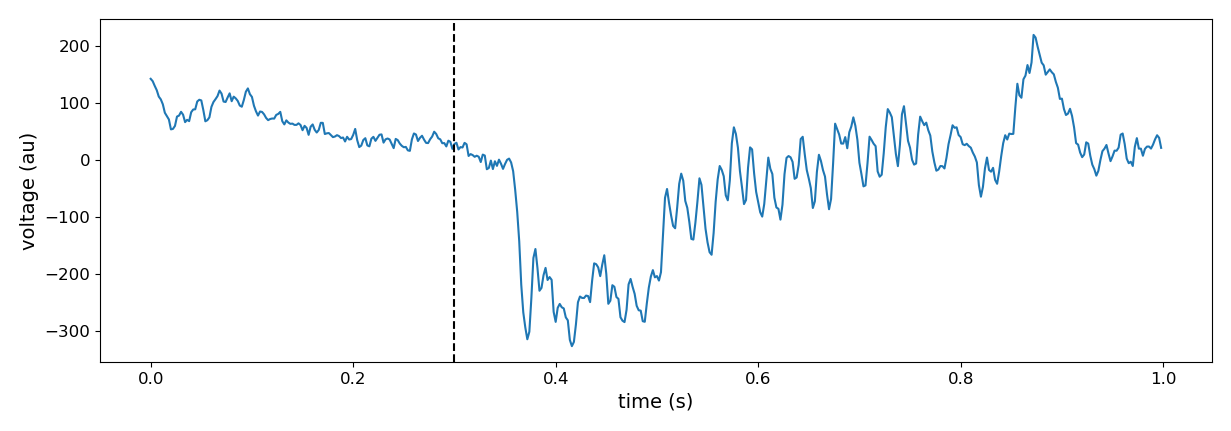

In [39]:
# create time-vector
n_seconds = lfp.shape[2]/FS
time = create_times(n_seconds, FS)
print(time.shape)

# set signal and choose random channel
signal = lfp[42,23,:]
signal.shape

# plot
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(time, signal)
ax.axvline(x=0.3, c='black', linestyle='--')
ax.set_ylabel('voltage (au)')
ax.set_xlabel('time (s)')

### Power spectra with SpecParam superimposed

In [40]:
# compute power spectrum
freq, psd = compute_spectrum(signal, FS, f_range=[1,45])

# parameterize
fm = FOOOF(min_peak_height=0.05, aperiodic_mode='knee', peak_threshold=2)
fm.fit(freq, psd)


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 1.00 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



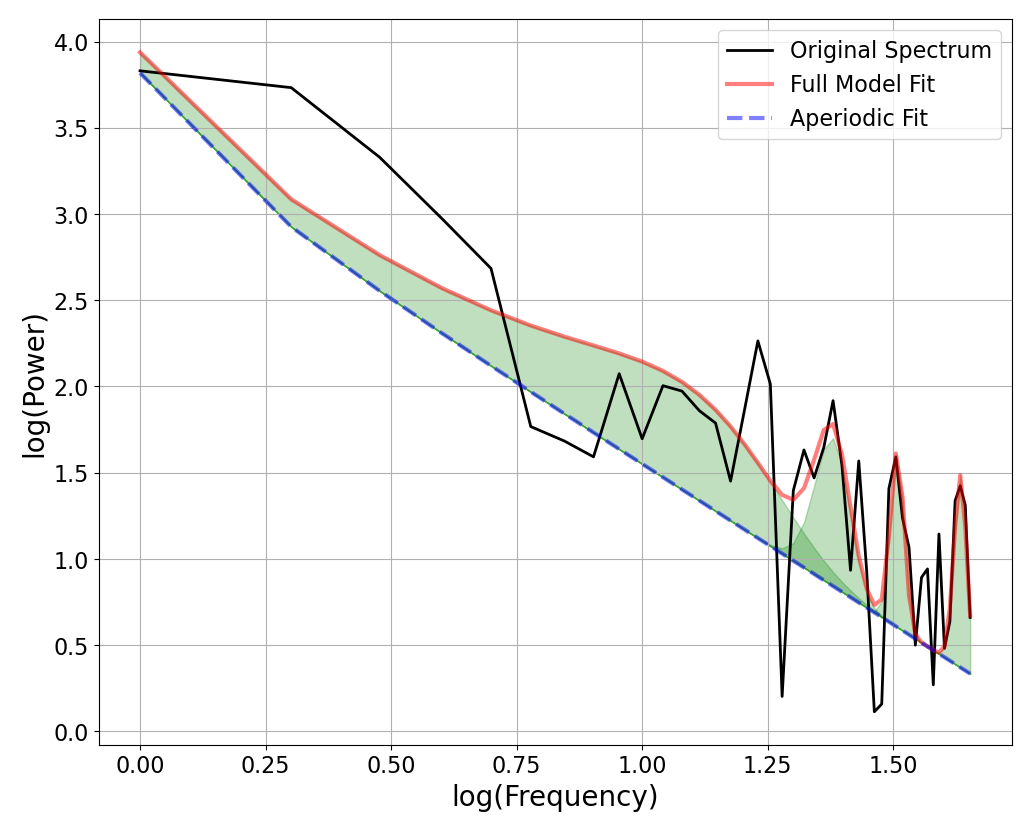

In [41]:
# plot specparam results
fm.plot(plot_peaks='shade', plt_log=True)

In [42]:
fm.print_results()

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 45 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset, knee, exponent):                           
                                     3.4044, -0.6143, 1.8569                                      
                                                                                                  
                                       4 peaks were found:                                        
          

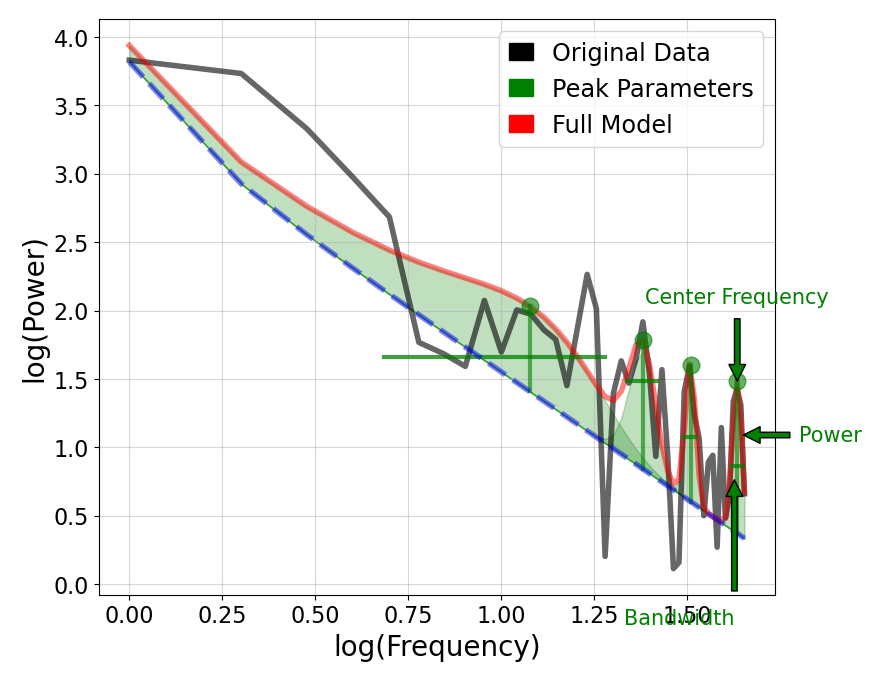

In [43]:
# Plot an annotated version of the power spectrum model
plot_annotated_model(fm, annotate_aperiodic=False, plt_log=True)

AttributeError: 'FOOOF' object has no attribute 'modeled_spectrum_'

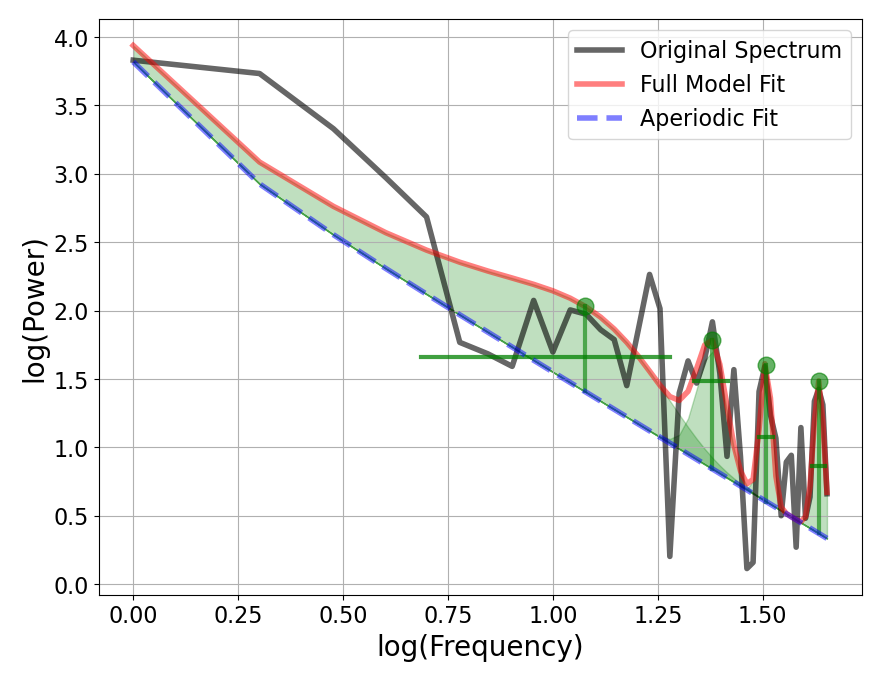

In [44]:
# Plot an annotated version of the power spectrum model
plot_annotated_model(fm, annotate_peaks=False, plt_log=True)

### Schematic baseline parameters

In [49]:
# load spectral parameters
params = pd.read_csv(fR"{EXTERNAL_PATH}\data\results\lfp_spectral_params.csv", index_col=0)

In [47]:
# plot and save in external drive
for i_session, session in enumerate(SESSIONS):

    # create directory for figure output
    dir_figs = f"{EXTERNAL_PATH}/figures/params_schematic/{session}"
    if not os.path.exists(dir_figs):
        os.makedirs(dir_figs)


    # get data for session
    df_session = params[params['session']==session]
    df_pre = df_session[df_session['epoch'] == 'pre']
    df_post = df_session[df_session['epoch'] == 'post']

    # define odml file path (contains metadata including electrode positions)
    odml_path = f"{EXTERNAL_PATH}/V1_v4_1024_electrode_resting_state_data/data/{session}/metadata_{session}.odml"

    # look through features
    for var in ['offset', 'exponent', 'knee', 'r_squared']:
        # setting limits for colorbar
        all_values = np.append(df_pre[f"{var}"], df_post[f"{var}"])
        maxli = np.nanmax(all_values)
        minli = np.nanmin(all_values)

        # pre-stimulus
        plot_schematic(df_pre[var], odml_path, title=f"session: {session}", 
                        label=f"pre-stimulus {var}", vmin=minli, vmax=maxli, 
                        fname_out=f"{dir_figs}/{session}_{var}_pre.png");
        # post-stimulus
        plot_schematic(df_post[var], odml_path, title=f"session: {session}", 
                        label=f"post-stimulus {var}", vmin=minli, vmax=maxli, 
                        fname_out=f"{dir_figs}/{session}_{var}_post.png");

        # change in var
        diff = df_post[var].values - df_pre[var].values
        plot_schematic(diff, odml_path, norm_type="centered", title=f"session: {session}", 
                        label=f"difference in {var}", vmin=np.nanmin(diff), vmax=np.nanmax(diff), 
                        fname_out=f"{dir_figs}/{session}_{var}_diff.png");

        plt.close('all')


warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
Validation found 0 errors and 1 warnings in 0 Sections and 1 Properties.
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> in odML document section <odML>  (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element <{http://www.w3.org/1999/xsl/transform}stylesheet> inside <odML> tag
 (line 5)
warning[None:5:<{http://www.w3.org/1999/xsl/transform}stylesheet>]: Invalid element 

### Histogram baseline parameters

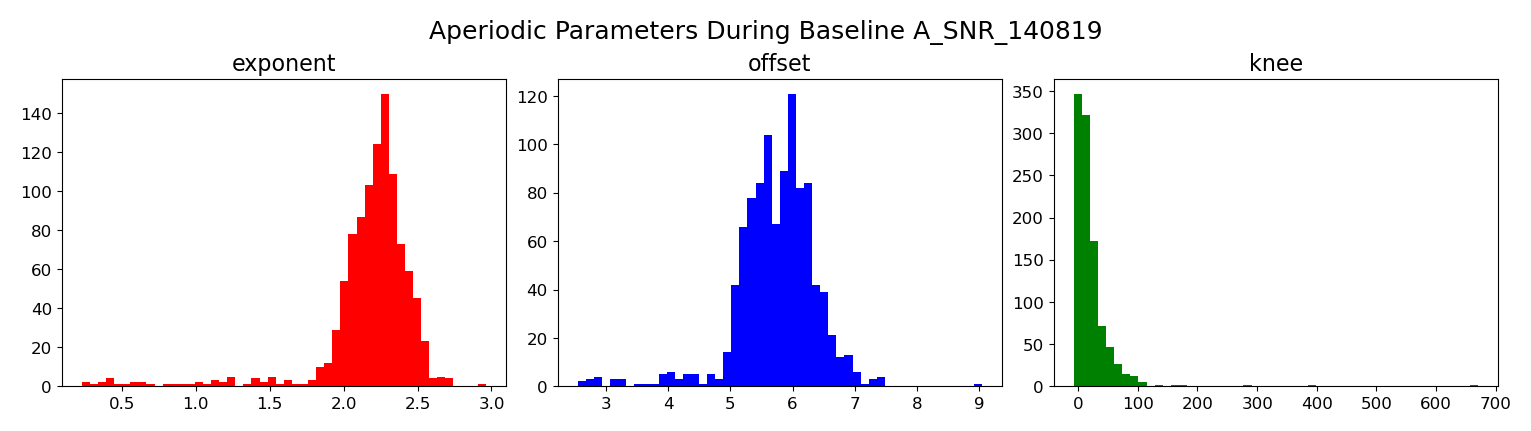

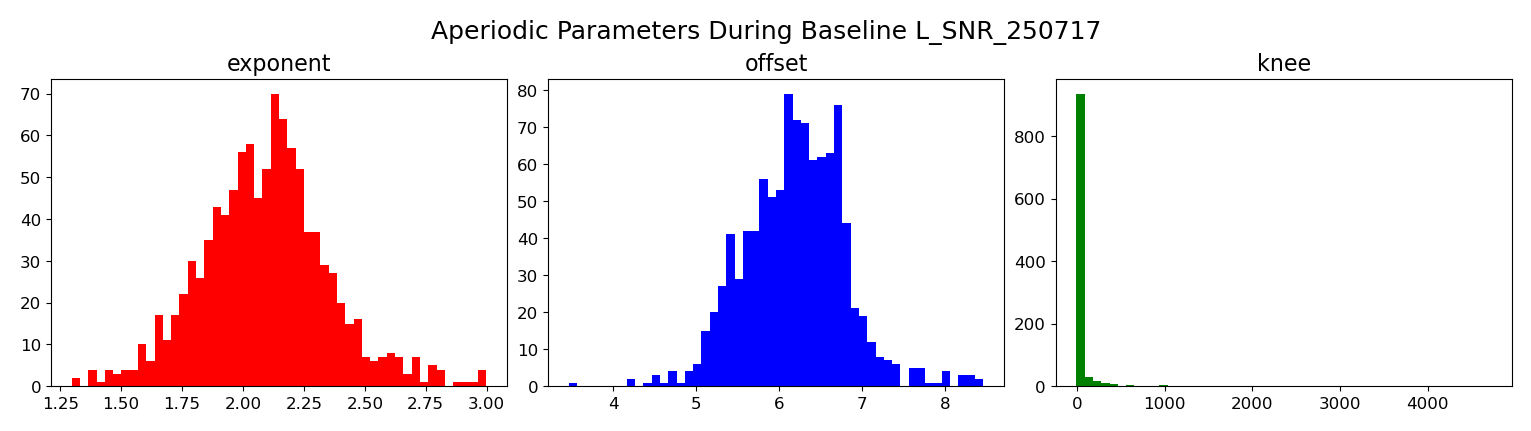

In [50]:
# plot params histogram for baseline
for session in SESSIONS:

    df = params[(params['session']  == session) & (params['epoch'] == 'pre')]

    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
    #exp
    ax1.hist(df.get('exponent'), bins=50, color='red')
    ax1.set_title('exponent')

    #off
    ax2.hist(df.get('offset'), bins=50, color='blue')
    ax2.set_title('offset')

    #knee
    ax3.hist(df.get('knee'), bins=50, color='green')
    ax3.set_title('knee')

    fig.suptitle(f'Aperiodic Parameters During Baseline {session}')
    fig.savefig(f'{EXTERNAL_PATH}/figures/params_schematic/{session}/params_histogram.png')